<a href="https://colab.research.google.com/github/pallavikumarisinha/Python-Dash/blob/main/EIA_Energy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Analysis using EIA API
This notebook demonstrates how to fetch energy-related data from the U.S. Energy Information Administration (EIA) API, perform analysis, and build a narrative with insights.

## Objectives:
1. Connect to EIA API and fetch electricity retail sales data.
2. Clean and prepare the data.
3. Perform exploratory data analysis (EDA).
4. Visualize trends and provide insights.
5. Summarize findings and implications.


In [1]:
# Install required libraries
!pip install requests pandas matplotlib seaborn plotly

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Step 1: Connect to EIA API
We will use the EIA API to fetch electricity retail sales data. You need an API key from [EIA](https://www.eia.gov/opendata/).


In [2]:
# Replace 'YOUR_EIA_API_KEY' with your actual EIA API key
API_KEY = "hzETvfDkuVncxwOM1DiQQhe1lc59lDk3XsggBQDn"

# Define the API endpoint for electricity retail sales data
url = f"https://api.eia.gov/v2/electricity/retail-sales/data/?api_key={API_KEY}&frequency=monthly"

# Fetch data from EIA API
response = requests.get(url)
data = response.json()

# Display the raw JSON keys
data.keys()


dict_keys(['warnings', 'response', 'request', 'apiVersion', 'ExcelAddInVersion'])

## Step 2: Load Data into DataFrame
We will convert the JSON response into a pandas DataFrame for easier manipulation and analysis.


In [3]:
# Extract the data portion from the JSON response
df = pd.DataFrame(data['response']['data'])

# Display the first few rows
df.head()


,period,stateid,stateDescription,sectorid,sectorName
0,2025-08,AK,Alaska,ALL,all sectors
1,2025-08,AK,Alaska,COM,commercial
2,2025-08,AK,Alaska,IND,industrial
3,2025-08,AK,Alaska,OTH,other
4,2025-08,AK,Alaska,RES,residential


## Step 3: Clean and Prepare Data
We will check for missing values, convert date formats, and ensure data types are correct.


In [7]:
print(df.head)

<bound method NDFrame.head of          period stateid    stateDescription sectorid      sectorName
4999 2024-07-01      MO            Missouri      COM      commercial
4893 2024-07-01     ENC  East North Central      OTH           other
4892 2024-07-01     ENC  East North Central      IND      industrial
4891 2024-07-01     ENC  East North Central      COM      commercial
4890 2024-07-01     ENC  East North Central      ALL     all sectors
...         ...     ...                 ...      ...             ...
252  2025-08-01      OR              Oregon      ALL     all sectors
253  2025-08-01      OR              Oregon      COM      commercial
254  2025-08-01      OR              Oregon      IND      industrial
245  2025-08-01      OH                Ohio      TRA  transportation
0    2025-08-01      AK              Alaska      ALL     all sectors

[5000 rows x 5 columns]>


In [4]:
# Check for missing values
print(df.isnull().sum())

# Convert 'period' column to datetime format
df['period'] = pd.to_datetime(df['period'])

# Display data types
df.dtypes


period              0
stateid             0
stateDescription    0
sectorid            0
sectorName          0
dtype: int64


,0
period,datetime64[ns]
stateid,object
stateDescription,object
sectorid,object
sectorName,object


## Step 4: Exploratory Data Analysis (EDA)
We will visualize trends over time and look for patterns in electricity distribution.


In [8]:
# 1. Records by Sector
sector_counts = df['sectorName'].value_counts().reset_index()
sector_counts.columns = ['sectorName', 'count']
fig = px.bar(sector_counts, x='sectorName', y='count',
             title='Distribution of Records by Sector')
fig.show()


In [9]:

# 2. Records by State
state_counts = df['stateDescription'].value_counts().head(10).reset_index()
state_counts.columns = ['stateDescription', 'count']
fig = px.bar(state_counts, x='stateDescription', y='count',
             title='Top 10 States by Record Count')
fig.show()


In [10]:

# 3. Records Over Time
df['year'] = df['period'].dt.year
year_counts = df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']
fig = px.line(year_counts, x='year', y='count',
              title='Number of Records Over Time')
fig.show()


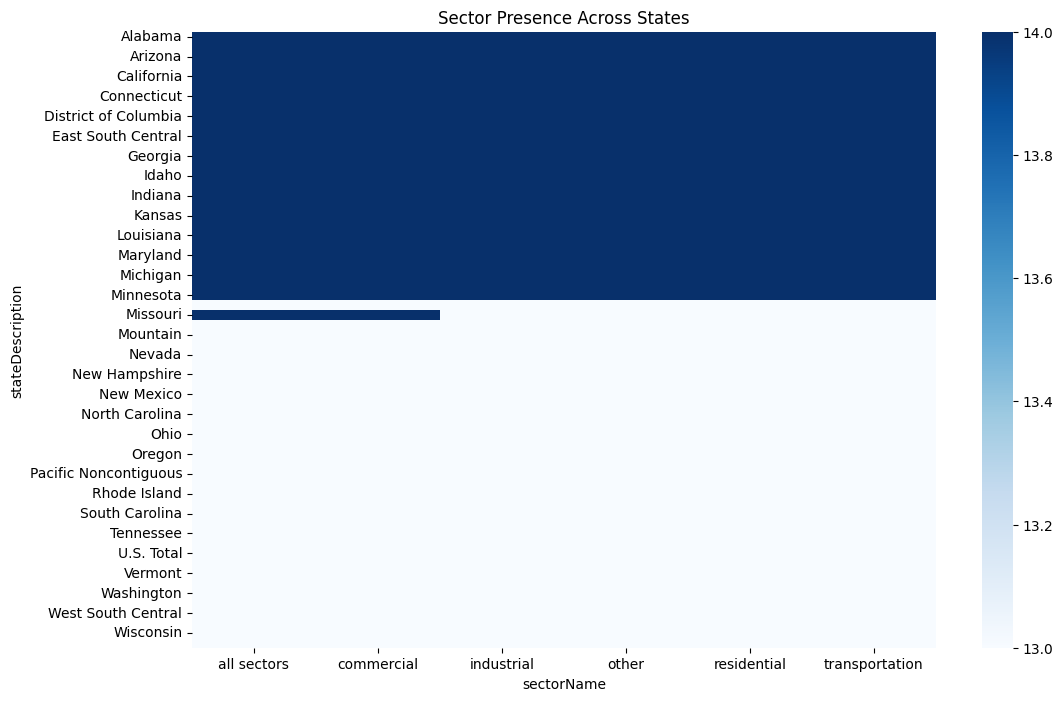

In [11]:

# 4. Sector vs State Heatmap
pivot = df.pivot_table(index='stateDescription', columns='sectorName', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Sector Presence Across States')
plt.show()